<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_DerivacionEIntegracion_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import sympy as sp


#1.Parte 1
1. En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación


\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde r, es la resistencia del ciruito, i es la corriente. Suponga que medimos la corriente con varios valores de t y obtenemos:

t = 1.00, 1.01, 1.02, 1.03, 1.0

i = 3.10, 3.12, 3.14, 3.18, 3.24


donde t se mide en segundos, i se de en amper, la inductancia L es una constante de 0.98 herios, la resistencia es de 0.142 ohms. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.





In [ ]:
# Parametros de problema

t = np.array([1.00,1.01,1.02,1.03,1.04]) # Tiempo
i = np.array([3.10,3.12,3.14,3.18,3.24]) # Corriente
em = np.array([1.00,1.01,1.02,1.03,1.04]) # Fuerza Electromotriz

R = 0.142 # Resistencia
L = 0.98 # Inductancia

In [ ]:
ii = (i[0:4] + i[1:5]) / 2
tt = (t[0:4] + t[1:5]) / 2

der = np.diff(i)/np.diff(t)

len(der)

4

In [ ]:
# Data Frame

dicc = {"Prom_t":tt,"Prom_i":ii,"Derivadas":der}

datos = pd.DataFrame(dicc)
datos

,Prom_t,Prom_i,Derivadas
0,1.005,3.11,2.0
1,1.015,3.13,2.0
2,1.025,3.16,4.0
3,1.035,3.21,6.0


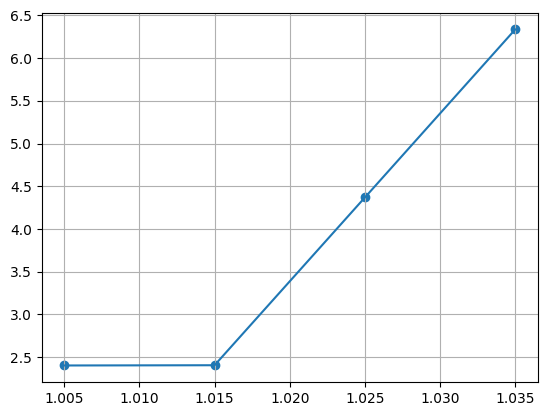

In [ ]:
fem = L*der + R*ii

inter_fem = sc.interpolate.lagrange(tt,fem)

plt.scatter(tt,fem)
plt.plot(tt,inter_fem(tt))
plt.grid()
plt.show()




# Parte 2

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson


3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

<!--
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$  -->


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

-
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


-

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

<!--
-
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$ -->

<!--
-
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$ -->


garantizando  que el error sea menor a $\varepsilon=1E-5$.  

In [ ]:
x = np.linspace(0,np.pi/4,10000)
I = np.zeros(len(x))

f = lambda x,y : 2*y*np.sin(x) + (np.cos(x))**2

for i, x_ in enumerate(x):
  y = np.linspace(np.sin(x_), np.cos(x_))
  I[i] = sc.integrate.trapezoid(f(x_,y),y)

sc.integrate.trapezoid(I,x)

0.5118446342202468

5. Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgL}}
\end{equation}

Cuando las oscilaciones no son pequenas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas. La anterior integral.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exact de la integral mostrado en el punto 5.

In [ ]:
# Parametros iniciales

m = 0.005 # masa de la varilla [kg]
L = 0.3 # longitud de la varilla [m]
theta = 45 * (np.pi/180) # ángulo inicial [rad]
I = (1/3)*m*(L**2) # momento de inercia
g = 9.8 # Gravedad [m/s²]

In [ ]:
p_t = lambda phi: 1/np.sqrt(1-(np.sin(theta/2)**2)*(np.sin(phi)**2))

phi = np.linspace(0,np.pi/2)
y = p_t(phi)

pt = sc.integrate.trapezoid(y,phi)
pt

1.6335863074581478

In [ ]:
P_0 = 2*(2*np.pi*np.sqrt(I/m*g*L))/np.pi
P = P_0*pt
P

1.9406015255040099

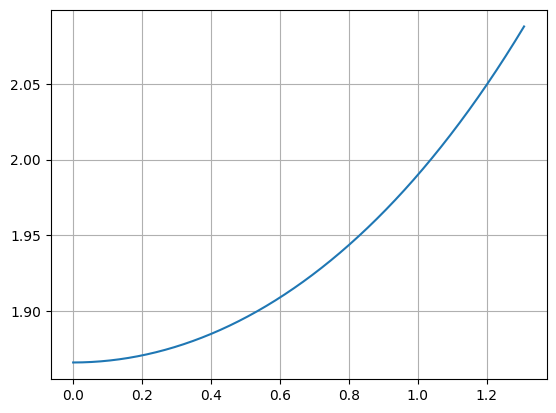

In [ ]:
theta = np.linspace(0,75)*(np.pi/180)
pt = np.zeros(50)

for i in range(0,50,1):

  k = np.sin((theta[i])/2)**2

  p_t = lambda phi: 1/np.sqrt(1-(k)*(np.sin(phi)**2))
  phi = np.linspace(0,np.pi/2)
  y = p_t(phi)

  pt[i] = sc.integrate.trapezoid(y,phi)


P = P_0*pt
P

plt.plot(theta,P)
plt.grid()
plt.show()

5. (No se resulve)The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integralevaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m)
\end{equation}



$m_1 = 1-m$,

$ 0 \le m \le1 $

$\epsilon(m)\leq 3\times 10^{-5}$



$a_0 = 1.3862944$

$b_0 = 0.5$

$a_1 = 0.1119723$

$b_1 = 0.1213478$

$a_2 = 0.00725296$

$b_2 = 0.0288729$

6. Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r



<!-- 7. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity -->


7 (No se resulve)Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}

7.2. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form
with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |...|...|...|
|   10  |...|...|...|

7.3. Make a log-log plot of relative errore versus. You should observe that
$\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the numver of decimal places of presicion in your calculation.
7.4. Use your plot or table to stimate the power-law dependence of the error $\epsilon$ on the number of points N and to determine the number of decimal places of presicion in your calculation. Do this for both the trapezoid and simpsons rules and for both the algolrithmic and round-off error regimes. (Note that if may be hard to reach the round-off error regime for the trapezoid rule becasue the aproximation ) error is so large